In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuração para melhor visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


# Análise: Notas do TP2 vs Motivação por Tipo de Estudo

Este notebook compara as **notas médias do TP2** com a **motivação específica** para o tipo de estudo que cada aluno realizou:
- Alunos que fizeram **ESTUDO DE CASO** → compara nota com motivação para "Estudo de caso"
- Alunos que fizeram **SURVEY** → compara nota com motivação para "Survey"  
- Alunos que fizeram **EXPERIMENTO CONTROLADO** → compara nota com motivação para "Análise Estatística de Experimentos"


In [14]:
# Carrega os dados do feedback
df_feedback = pd.read_csv("../csv/feedback-v2.csv")
df_feedback.columns = df_feedback.columns.str.strip()

# Carrega os dados do TP2
df_tp2 = pd.read_csv("../csv/TP2.csv")

print("Colunas do feedback-v2.csv:")
print(df_feedback.columns.tolist()[:10])
print("\nPrimeiras linhas do TP2.csv:")
print(df_tp2.head())


Colunas do feedback-v2.csv:
['Carimbo de data/hora', 'Coluna 1', 'Coluna 2', 'Qual sua matrícula?', 'Qual o seu curso?', 'Qual o seu semestre atual?', 'Como você se identifica em relação ao gênero', 'Antes da disciplina, qual era o seu nível de conhecimento em Engenharia de Software Experimental?', 'Antes da disciplina, quais conteúdos de Engenharia de Software Experimental você já havia utilizado na condução de estudos?', 'Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) antes da disciplina?']

Primeiras linhas do TP2.csv:
   Matrícula Nome  Unnamed: 2      Unnamed: 3  Unnamed: 4  \
0        NaN  NaN         NaN             NaN         NaN   
1        NaN  NaN         NaN  ESTUDO DE CASO    553434.0   
2        NaN  NaN         NaN             NaN    511175.0   
3        NaN  NaN         NaN             NaN    499785.0   
4        NaN  NaN         NaN             NaN    540054.0   

                       Unnamed: 5          Unn

In [15]:
# Processa o TP2.csv para extrair: matrícula, tipo de estudo e NOTA MÉDIA
# O tipo de estudo está na coluna 3 (índice 3)
# As matrículas estão na coluna 0 (líder) ou coluna 4 (membros)
# A nota média está na última coluna (TP2 - Média)

tipos_estudo_tp2 = []
matriculas_tp2 = []
notas_tp2 = []

tipo_estudo_atual = None
nota_grupo_atual = None

# Pula as duas primeiras linhas (cabeçalhos)
for idx, row in df_tp2.iterrows():
    if idx < 2:  # Pula cabeçalhos
        continue
    
    # Verifica se há um tipo de estudo na coluna 3 (índice 3)
    tipo_estudo = str(row.iloc[3]).strip().upper() if pd.notna(row.iloc[3]) else ""
    
    # Se encontrou um tipo de estudo válido, atualiza
    if tipo_estudo in ['ESTUDO DE CASO', 'EXPERIMENTO CONTROLADO', 'SURVEY']:
        tipo_estudo_atual = tipo_estudo
    
    # Extrai a nota média (última coluna)
    nota_str = str(row.iloc[-1]).strip() if pd.notna(row.iloc[-1]) else ""
    if nota_str and nota_str != 'nan' and nota_str != '':
        try:
            # Converte de formato brasileiro (vírgula) para float
            nota_str = nota_str.replace(',', '.')
            nota_grupo_atual = float(nota_str)
        except (ValueError, TypeError):
            pass
    
    # Extrai a matrícula - pode estar na coluna 0 (líder) ou coluna 4 (membros)
    matricula = None
    if pd.notna(row.iloc[4]):  # Tenta primeiro a coluna 4 (membros)
        matricula = row.iloc[4]
    elif pd.notna(row.iloc[0]):  # Se não, tenta a coluna 0 (líder)
        matricula = row.iloc[0]
    
    # Se há uma matrícula válida, tipo de estudo e nota, adiciona
    if pd.notna(matricula) and tipo_estudo_atual and nota_grupo_atual is not None:
        try:
            matricula_str = str(matricula).strip()
            if matricula_str and matricula_str != 'nan' and matricula_str != '':
                matricula_int = int(float(matricula_str))
                tipos_estudo_tp2.append(tipo_estudo_atual)
                matriculas_tp2.append(matricula_int)
                notas_tp2.append(nota_grupo_atual)
        except (ValueError, TypeError):
            pass

# Cria DataFrame com os dados do TP2
df_tp2_processado = pd.DataFrame({
    'Matrícula': matriculas_tp2,
    'Tipo Estudo TP2': tipos_estudo_tp2,
    'Nota Média TP2': notas_tp2
})

# Remove duplicatas (caso algum aluno apareça mais de uma vez)
df_tp2_processado = df_tp2_processado.drop_duplicates(subset='Matrícula')

print(f"Total de alunos no TP2: {len(df_tp2_processado)}")
print("\nDistribuição por tipo de estudo:")
print(df_tp2_processado['Tipo Estudo TP2'].value_counts())
print("\nEstatísticas das notas:")
print(df_tp2_processado['Nota Média TP2'].describe())
print("\nPrimeiras linhas:")
print(df_tp2_processado.head(10))


Total de alunos no TP2: 51

Distribuição por tipo de estudo:
Tipo Estudo TP2
SURVEY                    21
ESTUDO DE CASO            18
EXPERIMENTO CONTROLADO    12
Name: count, dtype: int64

Estatísticas das notas:
count    51.000000
mean      5.798039
std       0.677492
min       4.900000
25%       5.100000
50%       6.000000
75%       6.500000
max       6.600000
Name: Nota Média TP2, dtype: float64

Primeiras linhas:
   Matrícula Tipo Estudo TP2  Nota Média TP2
0     475320  ESTUDO DE CASO             6.6
1     499351  ESTUDO DE CASO             6.6
2     574238  ESTUDO DE CASO             6.6
3     535741  ESTUDO DE CASO             6.6
4     537725  ESTUDO DE CASO             6.6
5     536216  ESTUDO DE CASO             6.6
6     499340  ESTUDO DE CASO             6.5
7     500699  ESTUDO DE CASO             6.5
8     494837  ESTUDO DE CASO             6.5
9     537016  ESTUDO DE CASO             6.5


In [16]:
# Mapeia as escalas de motivação
motiv_scale = {
    "Desmotivado(a)": 1,
    "Neutro(a)": 2,
    "Motivado(a)": 3,
    "Muito motivado(a)": 4
}

contrib_scale = {
    "Discordo totalmente": 1,
    "Discordo": 2,
    "Neutro": 3,
    "Concordo": 4,
    "Concordo totalmente": 5
}

# Colunas de motivação
motiv_cols = [
    "Estudo de caso", 
    "Survey", 
    "Revisão Sistemática da Literatura (RSL)", 
    "Análise Estatística de Experimentos", 
    "Análise Qualitativa"
]

# Aplica o mapeamento de escalas
for col in motiv_cols:
    if col in df_feedback.columns:
        df_feedback[col] = df_feedback[col].map(motiv_scale)

# Mapeia a percepção de contribuição
if "Você acredita que a disciplina vai contribuir para sua formação?" in df_feedback.columns:
    df_feedback["Percepção Contribuição"] = df_feedback["Você acredita que a disciplina vai contribuir para sua formação?"] \
        .map(contrib_scale) \
        .fillna(3)

# Extrai a matrícula do feedback
coluna_matricula = "Qual sua matrícula?"
if coluna_matricula in df_feedback.columns:
    df_feedback['Matrícula'] = pd.to_numeric(df_feedback[coluna_matricula], errors='coerce')

print("Dados de motivação processados:")
print(df_feedback[['Matrícula'] + motiv_cols + ['Percepção Contribuição']].head())


Dados de motivação processados:
   Matrícula  Estudo de caso  Survey  Revisão Sistemática da Literatura (RSL)  \
0     574238               4       4                                        2   
1     499351               4       4                                        2   
2     537725               3       3                                        4   
3     475320               2       3                                        2   
4     540240               3       3                                        2   

   Análise Estatística de Experimentos  Análise Qualitativa  \
0                                    4                    4   
1                                    3                    4   
2                                    4                    4   
3                                    3                    3   
4                                    4                    2   

   Percepção Contribuição  
0                       5  
1                       5  
2                 

In [17]:
# Faz o merge entre feedback e TP2 usando a matrícula
df_comparacao = df_feedback.merge(
    df_tp2_processado,
    on='Matrícula',
    how='inner'
)

# Mapeia o tipo de estudo do TP2 para a coluna de motivação correspondente
mapeamento_tipo_motiv = {
    'ESTUDO DE CASO': 'Estudo de caso',
    'EXPERIMENTO CONTROLADO': 'Análise Estatística de Experimentos',
    'SURVEY': 'Survey'
}

# Cria coluna com a motivação específica para o tipo de estudo realizado
def obter_motivacao_especifica(row):
    tipo_estudo = row['Tipo Estudo TP2']
    col_motiv = mapeamento_tipo_motiv.get(tipo_estudo, None)
    if col_motiv and col_motiv in row.index:
        return row[col_motiv]
    return None

df_comparacao['Motivação Específica'] = df_comparacao.apply(obter_motivacao_especifica, axis=1)

print(f"Total de alunos com dados completos (feedback + TP2): {len(df_comparacao)}")
print(f"\nDistribuição por tipo de estudo do TP2:")
print(df_comparacao['Tipo Estudo TP2'].value_counts())
print("\nPrimeiras linhas do dataset combinado:")
print(df_comparacao[['Matrícula', 'Tipo Estudo TP2', 'Nota Média TP2', 'Motivação Específica']].head(10))


Total de alunos com dados completos (feedback + TP2): 21

Distribuição por tipo de estudo do TP2:
Tipo Estudo TP2
ESTUDO DE CASO            9
EXPERIMENTO CONTROLADO    7
SURVEY                    5
Name: count, dtype: int64

Primeiras linhas do dataset combinado:
   Matrícula         Tipo Estudo TP2  Nota Média TP2  Motivação Específica
0     574238          ESTUDO DE CASO             6.6                     4
1     499351          ESTUDO DE CASO             6.6                     4
2     537725          ESTUDO DE CASO             6.6                     3
3     475320          ESTUDO DE CASO             6.6                     2
4     540240                  SURVEY             5.6                     3
5     540224                  SURVEY             5.6                     2
6     535741          ESTUDO DE CASO             6.6                     3
7     540416                  SURVEY             5.6                     3
8     475304  EXPERIMENTO CONTROLADO             4.9         

In [18]:
# Calcula estatísticas descritivas: Nota vs Motivação por tipo de estudo
print("=" * 100)
print("ESTATÍSTICAS DESCRITIVAS: Nota Média TP2 vs Motivação Específica")
print("=" * 100)

resultados_comparacao = []

for tipo_estudo in sorted(df_comparacao['Tipo Estudo TP2'].unique()):
    subset = df_comparacao[df_comparacao['Tipo Estudo TP2'] == tipo_estudo].copy()
    subset = subset.dropna(subset=['Nota Média TP2', 'Motivação Específica'])
    
    if len(subset) > 0:
        resultado = {
            'Tipo Estudo TP2': tipo_estudo,
            'N': len(subset),
            'Média Nota TP2': subset['Nota Média TP2'].mean(),
            'Desvio Padrão Nota': subset['Nota Média TP2'].std(),
            'Média Motivação Específica': subset['Motivação Específica'].mean(),
            'Desvio Padrão Motivação': subset['Motivação Específica'].std(),
            'Correlação (Pearson)': subset['Nota Média TP2'].corr(subset['Motivação Específica']),
            'Correlação (Spearman)': subset['Nota Média TP2'].corr(subset['Motivação Específica'], method='spearman')
        }
        resultados_comparacao.append(resultado)
        
        print(f"\n{tipo_estudo} (n={len(subset)}):")
        print(f"  Nota Média TP2: {subset['Nota Média TP2'].mean():.2f} ± {subset['Nota Média TP2'].std():.2f}")
        print(f"  Motivação Específica: {subset['Motivação Específica'].mean():.2f} ± {subset['Motivação Específica'].std():.2f}")
        print(f"  Correlação Pearson: {resultado['Correlação (Pearson)']:.3f}")
        print(f"  Correlação Spearman: {resultado['Correlação (Spearman)']:.3f}")

df_resultados = pd.DataFrame(resultados_comparacao)
print("\n" + "="*100)
print("Tabela Resumo:")
print(df_resultados.to_string(index=False))


ESTATÍSTICAS DESCRITIVAS: Nota Média TP2 vs Motivação Específica

ESTUDO DE CASO (n=9):
  Nota Média TP2: 6.53 ± 0.09
  Motivação Específica: 3.11 ± 0.78
  Correlação Pearson: 0.308
  Correlação Spearman: 0.261

EXPERIMENTO CONTROLADO (n=7):
  Nota Média TP2: 5.39 ± 0.83
  Motivação Específica: 3.14 ± 1.07
  Correlação Pearson: -0.730
  Correlação Spearman: -0.683

SURVEY (n=5):
  Nota Média TP2: 5.40 ± 0.27
  Motivação Específica: 3.20 ± 0.84
  Correlação Pearson: -0.873
  Correlação Spearman: -0.913

Tabela Resumo:
       Tipo Estudo TP2  N  Média Nota TP2  Desvio Padrão Nota  Média Motivação Específica  Desvio Padrão Motivação  Correlação (Pearson)  Correlação (Spearman)
        ESTUDO DE CASO  9        6.533333            0.086603                    3.111111                 0.781736              0.307729               0.261239
EXPERIMENTO CONTROLADO  7        5.385714            0.829515                    3.142857                 1.069045             -0.730297              -0.6831

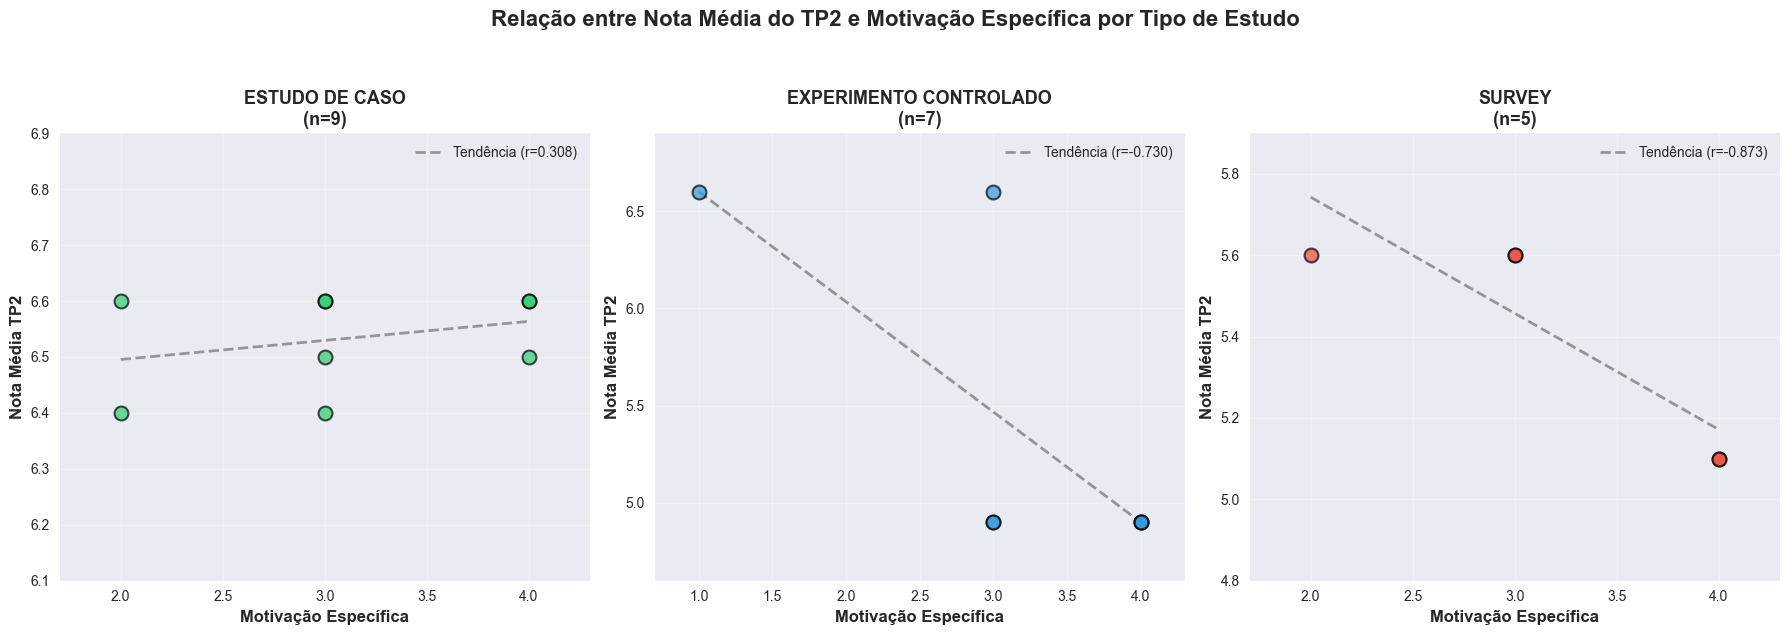

In [19]:
# Visualização: Scatter plots - Nota TP2 vs Motivação Específica por tipo de estudo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

tipos_estudo = sorted(df_comparacao['Tipo Estudo TP2'].unique())
cores = ['#2ecc71', '#3498db', '#e74c3c']

for idx, (tipo_estudo, cor) in enumerate(zip(tipos_estudo, cores)):
    subset = df_comparacao[df_comparacao['Tipo Estudo TP2'] == tipo_estudo].copy()
    subset = subset.dropna(subset=['Nota Média TP2', 'Motivação Específica'])
    
    if len(subset) > 0:
        ax = axes[idx]
        
        # Scatter plot
        ax.scatter(subset['Motivação Específica'], subset['Nota Média TP2'], 
                  s=100, alpha=0.7, color=cor, edgecolors='black', linewidth=1.5, zorder=3)
        
        # Adiciona labels com matrícula (opcional, pode comentar se ficar poluído)
        # for _, row in subset.iterrows():
        #     ax.annotate(str(int(row['Matrícula']))[-3:], 
        #                (row['Motivação Específica'], row['Nota Média TP2']),
        #                fontsize=8, alpha=0.6)
        
        # Linha de regressão
        if len(subset) >= 2:
            z = np.polyfit(subset['Motivação Específica'], subset['Nota Média TP2'], 1)
            p = np.poly1d(z)
            x_line = np.linspace(subset['Motivação Específica'].min(), 
                                subset['Motivação Específica'].max(), 100)
            ax.plot(x_line, p(x_line), "--", color='gray', alpha=0.8, linewidth=2, 
                   label=f'Tendência (r={subset["Nota Média TP2"].corr(subset["Motivação Específica"]):.3f})')
        
        # Configurações do gráfico
        ax.set_xlabel('Motivação Específica', fontsize=12, fontweight='bold')
        ax.set_ylabel('Nota Média TP2', fontsize=12, fontweight='bold')
        ax.set_title(f'{tipo_estudo}\n(n={len(subset)})', fontsize=13, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        
        # Ajusta limites
        ax.set_xlim(subset['Motivação Específica'].min() - 0.3, 
                   subset['Motivação Específica'].max() + 0.3)
        ax.set_ylim(subset['Nota Média TP2'].min() - 0.3, 
                   subset['Nota Média TP2'].max() + 0.3)

plt.suptitle('Relação entre Nota Média do TP2 e Motivação Específica por Tipo de Estudo', 
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


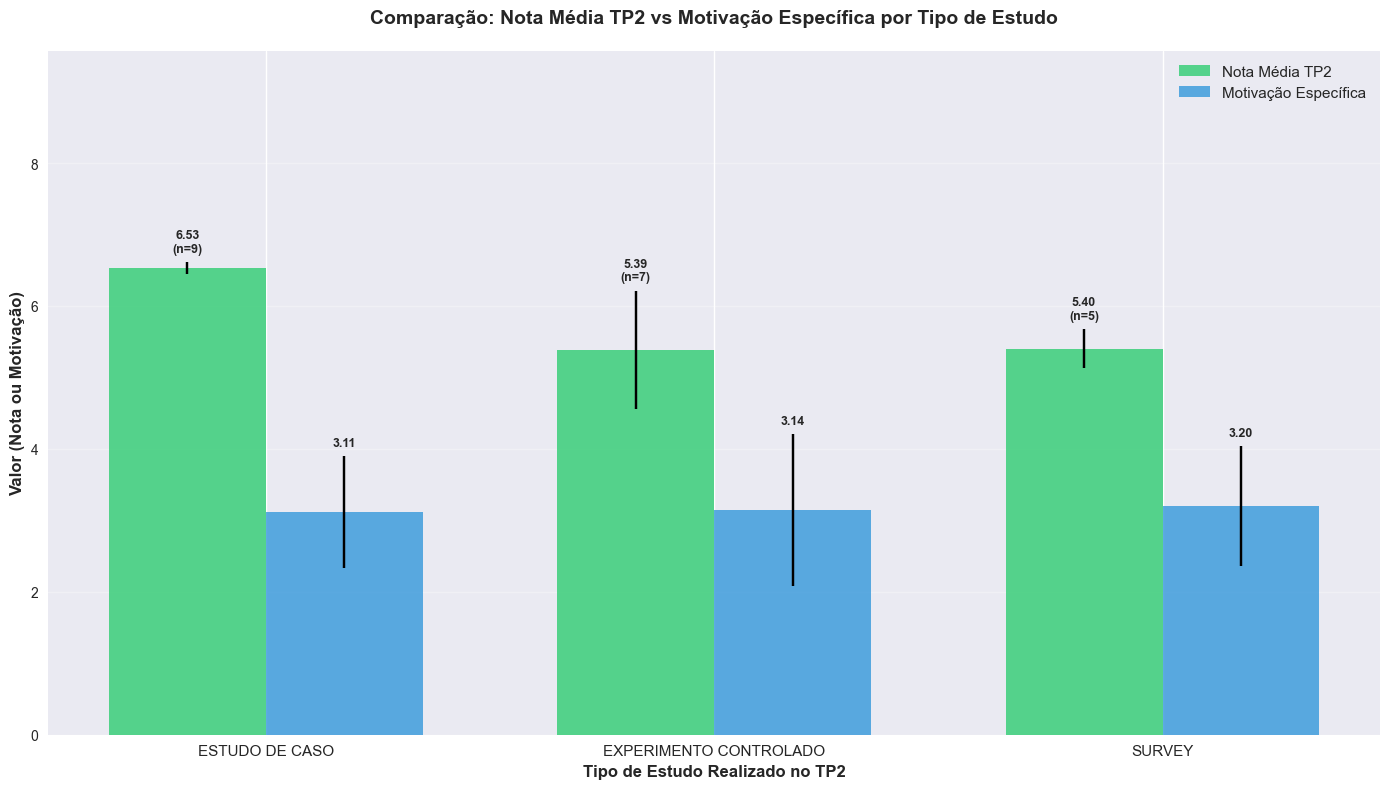

In [20]:
# Visualização: Gráfico combinado - Nota e Motivação lado a lado
fig, ax = plt.subplots(figsize=(14, 8))

tipos_estudo = sorted(df_comparacao['Tipo Estudo TP2'].unique())
x = np.arange(len(tipos_estudo))
width = 0.35

# Prepara os dados
medias_notas = []
medias_motiv = []
desvios_notas = []
desvios_motiv = []
ns = []

for tipo_estudo in tipos_estudo:
    subset = df_comparacao[df_comparacao['Tipo Estudo TP2'] == tipo_estudo].copy()
    subset = subset.dropna(subset=['Nota Média TP2', 'Motivação Específica'])
    
    medias_notas.append(subset['Nota Média TP2'].mean())
    medias_motiv.append(subset['Motivação Específica'].mean())
    desvios_notas.append(subset['Nota Média TP2'].std())
    desvios_motiv.append(subset['Motivação Específica'].std())
    ns.append(len(subset))

# Cria as barras
bars1 = ax.bar(x - width/2, medias_notas, width, yerr=desvios_notas, 
               label='Nota Média TP2', color='#2ecc71', alpha=0.8, capsize=5)
bars2 = ax.bar(x + width/2, medias_motiv, width, yerr=desvios_motiv, 
               label='Motivação Específica', color='#3498db', alpha=0.8, capsize=5)

# Adiciona valores nas barras
for i, (bar1, bar2, n) in enumerate(zip(bars1, bars2, ns)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1 + desvios_notas[i] + 0.1,
            f'{height1:.2f}\n(n={n})', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.text(bar2.get_x() + bar2.get_width()/2., height2 + desvios_motiv[i] + 0.1,
            f'{height2:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Tipo de Estudo Realizado no TP2', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor (Nota ou Motivação)', fontsize=12, fontweight='bold')
ax.set_title('Comparação: Nota Média TP2 vs Motivação Específica por Tipo de Estudo', 
              fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tipos_estudo, fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

max_val = max(max(medias_notas) + max(desvios_notas), 
              max(medias_motiv) + max(desvios_motiv))
ax.set_ylim(0, max_val * 1.3)

plt.tight_layout()
plt.show()


In [21]:
# Análise estatística: Testes de correlação e significância
print("=" * 100)
print("TESTES ESTATÍSTICOS: Correlação entre Nota TP2 e Motivação Específica")
print("=" * 100)

for tipo_estudo in sorted(df_comparacao['Tipo Estudo TP2'].unique()):
    subset = df_comparacao[df_comparacao['Tipo Estudo TP2'] == tipo_estudo].copy()
    subset = subset.dropna(subset=['Nota Média TP2', 'Motivação Específica'])
    
    if len(subset) >= 3:  # Mínimo de 3 observações para correlação
        notas = subset['Nota Média TP2'].values
        motivacoes = subset['Motivação Específica'].values
        
        # Correlação de Pearson
        r_pearson, p_pearson = stats.pearsonr(notas, motivacoes)
        
        # Correlação de Spearman
        r_spearman, p_spearman = stats.spearmanr(notas, motivacoes)
        
        print(f"\n{tipo_estudo} (n={len(subset)}):")
        print(f"  Correlação de Pearson: r={r_pearson:.3f}, p={p_pearson:.4f}", end="")
        sig_pearson = "***" if p_pearson < 0.001 else "**" if p_pearson < 0.01 else "*" if p_pearson < 0.05 else "ns"
        print(f" {sig_pearson}")
        
        print(f"  Correlação de Spearman: ρ={r_spearman:.3f}, p={p_spearman:.4f}", end="")
        sig_spearman = "***" if p_spearman < 0.001 else "**" if p_spearman < 0.01 else "*" if p_spearman < 0.05 else "ns"
        print(f" {sig_spearman}")
        
        # Teste de normalidade (para decidir qual correlação usar)
        if len(notas) <= 50:
            stat_norm_notas, p_norm_notas = stats.shapiro(notas)
            stat_norm_motiv, p_norm_motiv = stats.shapiro(motivacoes)
            print(f"  Normalidade (Shapiro-Wilk):")
            print(f"    Notas: W={stat_norm_notas:.3f}, p={p_norm_notas:.4f}")
            print(f"    Motivações: W={stat_norm_motiv:.3f}, p={p_norm_motiv:.4f}")
        
        # Regressão linear simples
        slope, intercept, r_value, p_value_reg, std_err = stats.linregress(motivacoes, notas)
        print(f"  Regressão Linear: Nota = {intercept:.2f} + {slope:.2f} × Motivação")
        print(f"    R² = {r_value**2:.3f}, p={p_value_reg:.4f}")
    else:
        print(f"\n{tipo_estudo}: Dados insuficientes (n={len(subset)})")


TESTES ESTATÍSTICOS: Correlação entre Nota TP2 e Motivação Específica

ESTUDO DE CASO (n=9):
  Correlação de Pearson: r=0.308, p=0.4205 ns
  Correlação de Spearman: ρ=0.261, p=0.4972 ns
  Normalidade (Shapiro-Wilk):
    Notas: W=0.748, p=0.0052
    Motivações: W=0.838, p=0.0548
  Regressão Linear: Nota = 6.43 + 0.03 × Motivação
    R² = 0.095, p=0.4205

EXPERIMENTO CONTROLADO (n=7):
  Correlação de Pearson: r=-0.730, p=0.0624 ns
  Correlação de Spearman: ρ=-0.683, p=0.0907 ns
  Normalidade (Shapiro-Wilk):
    Notas: W=0.600, p=0.0003
    Motivações: W=0.781, p=0.0261
  Regressão Linear: Nota = 7.17 + -0.57 × Motivação
    R² = 0.533, p=0.0624

SURVEY (n=5):
  Correlação de Pearson: r=-0.873, p=0.0534 ns
  Correlação de Spearman: ρ=-0.913, p=0.0305 *
  Normalidade (Shapiro-Wilk):
    Notas: W=0.684, p=0.0065
    Motivações: W=0.881, p=0.3140
  Regressão Linear: Nota = 6.31 + -0.29 × Motivação
    R² = 0.762, p=0.0534


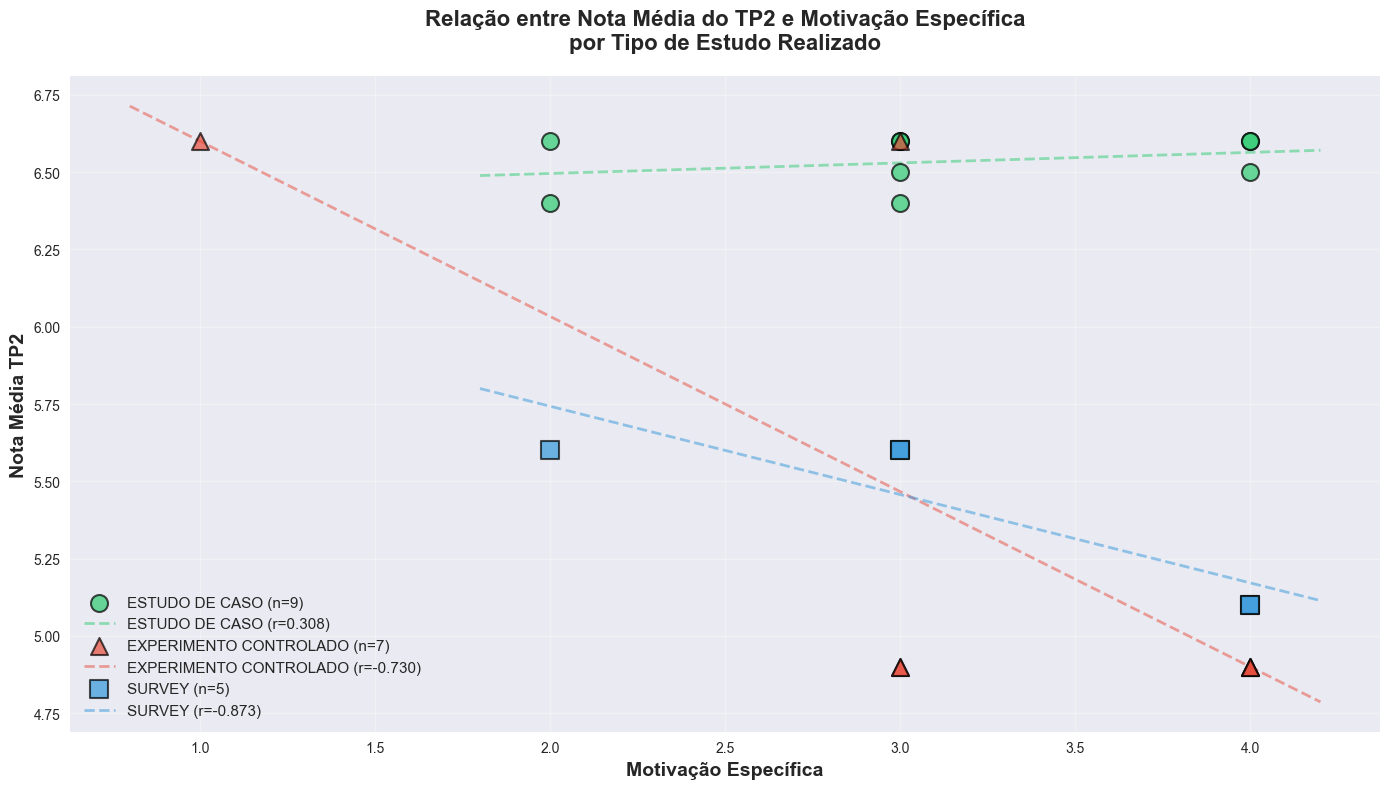

In [22]:
# Visualização: Gráfico único com todos os tipos de estudo
fig, ax = plt.subplots(figsize=(14, 8))

tipos_estudo = sorted(df_comparacao['Tipo Estudo TP2'].unique())
cores = {'ESTUDO DE CASO': '#2ecc71', 'SURVEY': '#3498db', 'EXPERIMENTO CONTROLADO': '#e74c3c'}
marcadores = {'ESTUDO DE CASO': 'o', 'SURVEY': 's', 'EXPERIMENTO CONTROLADO': '^'}

for tipo_estudo in tipos_estudo:
    subset = df_comparacao[df_comparacao['Tipo Estudo TP2'] == tipo_estudo].copy()
    subset = subset.dropna(subset=['Nota Média TP2', 'Motivação Específica'])
    
    if len(subset) > 0:
        # Scatter plot
        ax.scatter(subset['Motivação Específica'], subset['Nota Média TP2'], 
                  s=150, alpha=0.7, color=cores[tipo_estudo], 
                  marker=marcadores[tipo_estudo], edgecolors='black', linewidth=1.5, 
                  label=f'{tipo_estudo} (n={len(subset)})', zorder=3)
        
        # Linha de regressão
        if len(subset) >= 2:
            z = np.polyfit(subset['Motivação Específica'], subset['Nota Média TP2'], 1)
            p = np.poly1d(z)
            x_line = np.linspace(subset['Motivação Específica'].min() - 0.2, 
                                subset['Motivação Específica'].max() + 0.2, 100)
            r = subset['Nota Média TP2'].corr(subset['Motivação Específica'])
            ax.plot(x_line, p(x_line), "--", color=cores[tipo_estudo], 
                   alpha=0.5, linewidth=2, label=f'{tipo_estudo} (r={r:.3f})')

ax.set_xlabel('Motivação Específica', fontsize=14, fontweight='bold')
ax.set_ylabel('Nota Média TP2', fontsize=14, fontweight='bold')
ax.set_title('Relação entre Nota Média do TP2 e Motivação Específica\npor Tipo de Estudo Realizado', 
              fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
# Tabela detalhada com todos os dados
print("=" * 100)
print("TABELA DETALHADA: Nota TP2 vs Motivação Específica")
print("=" * 100)

df_detalhado = df_comparacao[['Matrícula', 'Tipo Estudo TP2', 'Nota Média TP2', 'Motivação Específica']].copy()
df_detalhado = df_detalhado.dropna(subset=['Nota Média TP2', 'Motivação Específica'])
df_detalhado = df_detalhado.sort_values(['Tipo Estudo TP2', 'Nota Média TP2'], ascending=[True, False])

print("\nDados completos ordenados por tipo de estudo e nota:")
print(df_detalhado.to_string(index=False))

# Salva em CSV se necessário
# df_detalhado.to_csv('../csv/notas_motivacao_tp2.csv', index=False)
# print("\nDados salvos em '../csv/notas_motivacao_tp2.csv'")


TABELA DETALHADA: Nota TP2 vs Motivação Específica

Dados completos ordenados por tipo de estudo e nota:
 Matrícula        Tipo Estudo TP2  Nota Média TP2  Motivação Específica
    574238         ESTUDO DE CASO             6.6                     4
    499351         ESTUDO DE CASO             6.6                     4
    537725         ESTUDO DE CASO             6.6                     3
    475320         ESTUDO DE CASO             6.6                     2
    535741         ESTUDO DE CASO             6.6                     3
    537016         ESTUDO DE CASO             6.5                     4
    499340         ESTUDO DE CASO             6.5                     3
    539802         ESTUDO DE CASO             6.4                     2
    541785         ESTUDO DE CASO             6.4                     3
    514389 EXPERIMENTO CONTROLADO             6.6                     3
    515185 EXPERIMENTO CONTROLADO             6.6                     1
    475304 EXPERIMENTO CONTROLA

In [24]:
# Resumo final: Estatísticas consolidadas
print("=" * 100)
print("RESUMO FINAL: Estatísticas Consolidadas")
print("=" * 100)

df_final = df_comparacao.dropna(subset=['Nota Média TP2', 'Motivação Específica'])

print(f"\nTotal de alunos analisados: {len(df_final)}")
print(f"\nEstatísticas Gerais:")
print(f"  Nota Média TP2: {df_final['Nota Média TP2'].mean():.2f} ± {df_final['Nota Média TP2'].std():.2f}")
print(f"  Motivação Específica: {df_final['Motivação Específica'].mean():.2f} ± {df_final['Motivação Específica'].std():.2f}")
print(f"  Correlação Geral (Pearson): {df_final['Nota Média TP2'].corr(df_final['Motivação Específica']):.3f}")
print(f"  Correlação Geral (Spearman): {df_final['Nota Média TP2'].corr(df_final['Motivação Específica'], method='spearman'):.3f}")

print("\n" + "="*100)
print("Distribuição por Tipo de Estudo:")
for tipo_estudo in sorted(df_final['Tipo Estudo TP2'].unique()):
    subset = df_final[df_final['Tipo Estudo TP2'] == tipo_estudo]
    print(f"\n  {tipo_estudo} (n={len(subset)}):")
    print(f"    Nota: {subset['Nota Média TP2'].mean():.2f} ± {subset['Nota Média TP2'].std():.2f} "
          f"[{subset['Nota Média TP2'].min():.2f} - {subset['Nota Média TP2'].max():.2f}]")
    print(f"    Motivação: {subset['Motivação Específica'].mean():.2f} ± {subset['Motivação Específica'].std():.2f} "
          f"[{subset['Motivação Específica'].min():.1f} - {subset['Motivação Específica'].max():.1f}]")
    if len(subset) >= 3:
        r, p = stats.pearsonr(subset['Nota Média TP2'], subset['Motivação Específica'])
        print(f"    Correlação: r={r:.3f}, p={p:.4f}")


RESUMO FINAL: Estatísticas Consolidadas

Total de alunos analisados: 21

Estatísticas Gerais:
  Nota Média TP2: 5.88 ± 0.75
  Motivação Específica: 3.14 ± 0.85
  Correlação Geral (Pearson): -0.379
  Correlação Geral (Spearman): -0.329

Distribuição por Tipo de Estudo:

  ESTUDO DE CASO (n=9):
    Nota: 6.53 ± 0.09 [6.40 - 6.60]
    Motivação: 3.11 ± 0.78 [2.0 - 4.0]
    Correlação: r=0.308, p=0.4205

  EXPERIMENTO CONTROLADO (n=7):
    Nota: 5.39 ± 0.83 [4.90 - 6.60]
    Motivação: 3.14 ± 1.07 [1.0 - 4.0]
    Correlação: r=-0.730, p=0.0624

  SURVEY (n=5):
    Nota: 5.40 ± 0.27 [5.10 - 5.60]
    Motivação: 3.20 ± 0.84 [2.0 - 4.0]
    Correlação: r=-0.873, p=0.0534


## Resumo e Conclusões

Este notebook analisou a relação entre:
- **Nota Média do TP2** (desempenho no trabalho prático)
- **Motivação Específica** para o tipo de estudo que cada aluno realizou:
  - Alunos que fizeram **ESTUDO DE CASO** → motivação para "Estudo de caso"
  - Alunos que fizeram **SURVEY** → motivação para "Survey"
  - Alunos que fizeram **EXPERIMENTO CONTROLADO** → motivação para "Análise Estatística de Experimentos"

### Principais análises realizadas:
1. **Estatísticas descritivas** comparando nota e motivação por tipo de estudo
2. **Visualizações** (scatter plots com linhas de regressão)
3. **Testes de correlação** (Pearson e Spearman)
4. **Análise de regressão linear** para cada tipo de estudo
5. **Tabela detalhada** com todos os dados individuais

### Objetivo:
Verificar se há relação entre a motivação do aluno para um tipo específico de estudo e seu desempenho (nota) ao realizar esse tipo de estudo no TP2.
